# Lab 

## Task 1 - Classification of Cardiovascular diseases




First, we import the dataset from Kaggle and do some preliminary EDA.

In [1]:
# Import cardiovascular dataset from Kaggle
# https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/cardio_train.csv', delimiter=';')

In [2]:
df.head(), df.shape, df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


(   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  ,
 (70000, 13),
 None,
                  id           age        gender        height        weight  \
 count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
 mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
 std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
 min    

### For task 1.1, using Pandas, Matplotlib, and Seaborn, address the following questions for the dataset:
1) How many are positive for cardiovascular disease and how many are negative?

In [3]:
# Count the number of patients with and without cardiovascular disease
df.value_counts('cardio')


cardio
0    35021
1    34979
Name: count, dtype: int64

2) What proportion have normal, above normal, and far above normal cholesterol levels?

In [4]:
print(df['cholesterol'].value_counts())

Normal = df[df['cholesterol'] == 1]
AboveNormal = df[df['cholesterol'] == 2]
High = df[df['cholesterol'] == 3]

print("\nProportion of patients with normal cholesterol: {:.2f}".format(len(Normal) / len(df)))
print("Proportion of patients with above normal cholesterol: {:.2f}".format(len(AboveNormal) / len(df)))
print("Proportion of patients with high cholesterol: {:.2f}".format(len(High) / len(df)))


cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

Proportion of patients with normal cholesterol: 0.75
Proportion of patients with above normal cholesterol: 0.14
Proportion of patients with high cholesterol: 0.12


3) What does the age distribution look like?

<Axes: xlabel='age_in_years', ylabel='Count'>

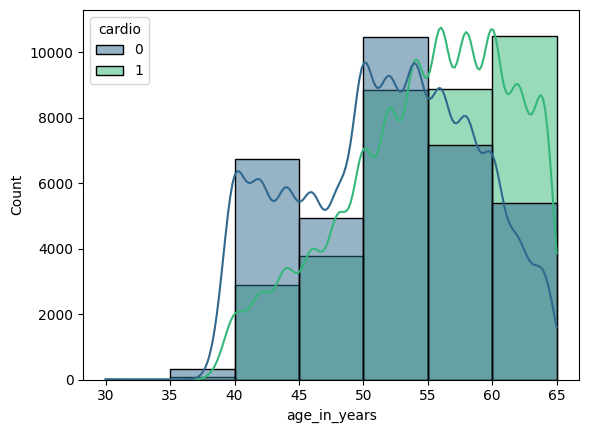

In [5]:
df['age_in_years'] = (df['age'] / 365).round(0)
df['age_in_years'].head()

sns.histplot(data=df, x='age_in_years', hue='cardio', kde=True, bins=7, palette='viridis')

4) What proportion are smokers?

In [6]:
# Counting smokers
smokers_df = df['smoke'].value_counts()

print(f"Porportion of smokers: {smokers_df[1] / len(df):.2%}")

Porportion of smokers: 8.81%


5) What does the weight distribution look like?

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

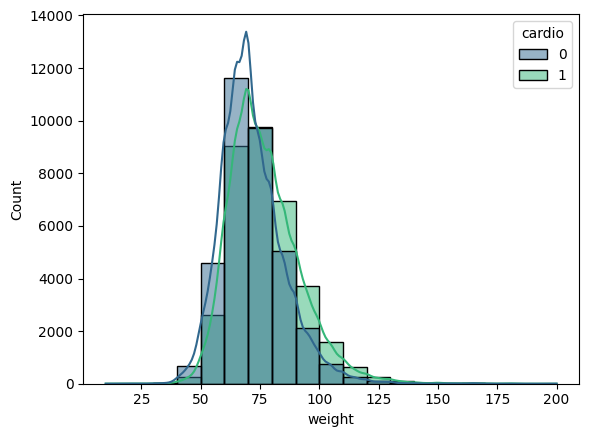

In [7]:
sns.histplot(data=df, x='weight', hue='cardio', kde=True, bins=19, palette='viridis')
df['weight'].describe()


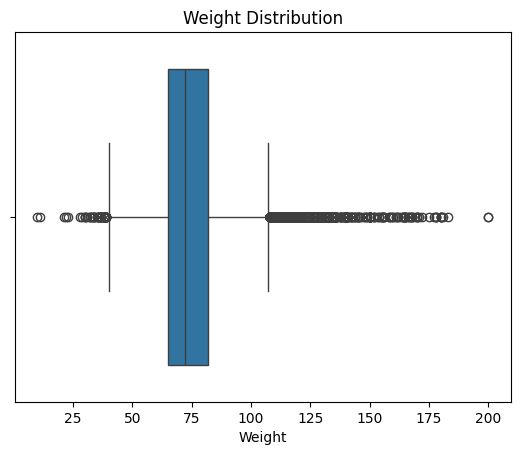

In [8]:
sns.boxplot(x=df['weight'])
plt.xlabel('Weight')
plt.title('Weight Distribution')
plt.show()

6) What does the height distribution look like?

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

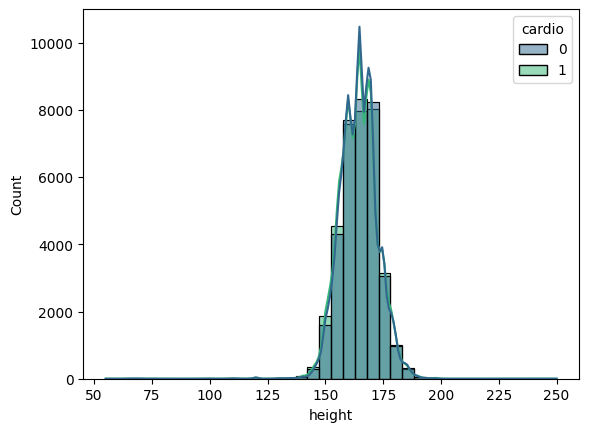

In [9]:
sns.histplot(data=df, x='height', hue='cardio', kde=True, bins=38, palette='viridis')
df['height'].describe()


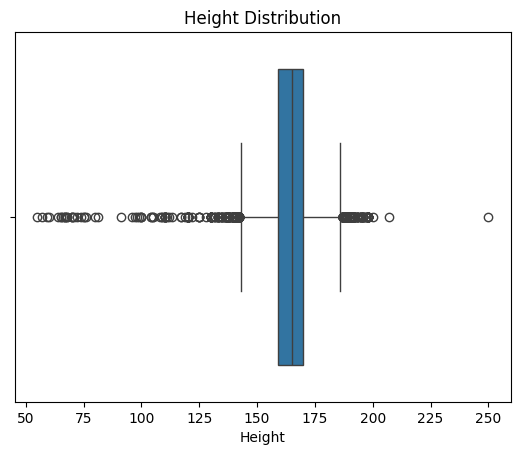

In [10]:
sns.boxplot(x=df['height'])
plt.xlabel('Height')
plt.title('Height Distribution')
plt.show()

7) What proportion of women and men have cardiovascular disease?
Summarize your findings and present them in a notebook. Use markdown boxes for narrative text.

In [11]:
# Proportion of men and women with cardiovascular disease

# Count of men and women with cardiovascular disease
men_cardio_count = df[(df['gender'] == 1) & (df['cardio'] == 1)].shape[0]
women_cardio_count = df[(df['gender'] == 2) & (df['cardio'] == 1)].shape[0]

# Total count of men and women in the dataset
total_men = df[df['gender'] == 1].shape[0]
total_women = df[df['gender'] == 2].shape[0]

# Calculate ratios
male_ratio = men_cardio_count / total_men if total_men > 0 else 0
female_ratio = women_cardio_count / total_women if total_women > 0 else 0

print(f"Number of men with cardiovascular diseases: {men_cardio_count}, {male_ratio:.2%}")
print(f"Number of women with cardiovascular diseases: {women_cardio_count}, {female_ratio:.2%}")


Number of men with cardiovascular diseases: 22616, 49.67%
Number of women with cardiovascular diseases: 12363, 50.52%


## 1.2 Create Heatmap
Now we'll find the correlations.

<Axes: >

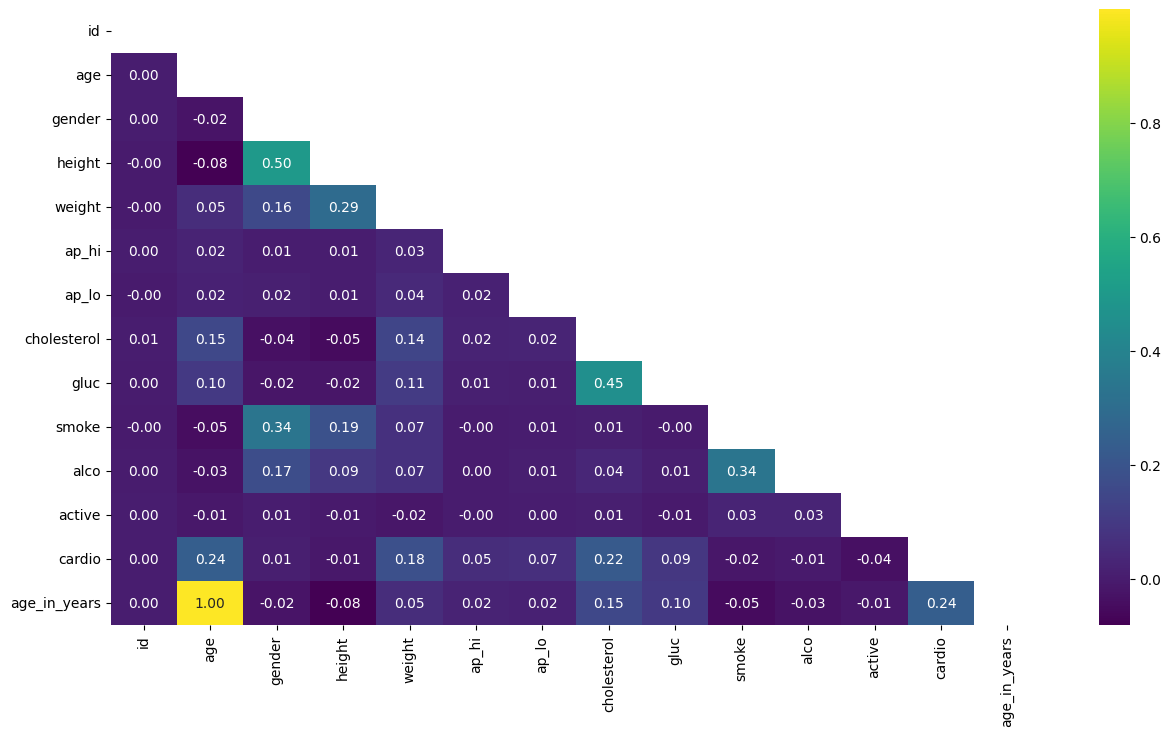

In [12]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), mask=mask, cmap='viridis', annot=True, fmt='.2f')

Findings: Age, weight, and cholesterol are the features most highly correlated to cardiovascular disease. Other notable correlations $( > 0.2 )$ are gender and weight to height, glucose to cholesterol, alcohol and gender to smoke.

The EDA underscores age being the largest correlating factor to cardiovascular disease.

### 1.2.1 Create a feature for BMI (Body Mass Index), read up on the formula on Wikipedia.
1) Discard the samples with implausible BMIs and outliers. Note that it may be difficult to determine the range of BMIs to retain. Describe how you arrive at the boundaries, with reasoning or reference.

In [13]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

According to the table on Wikipedia, the average participant is overweight:

| Weight Classes    | BMI           |
|-------------------|---------------|
| Underweight       | less than 18.5|
| Normal weight     | 18.5 – 25.0   |
| Overweight        | more than 25.0 – 30.0 |
| Obesity class 1   | more than 30.0 – 35.0 |
| Obesity class 2   | more than 35.0 – 40.0 |
| Obesity class 3   | more than 40  |


(15.416439003399613, 72.56326718016702)

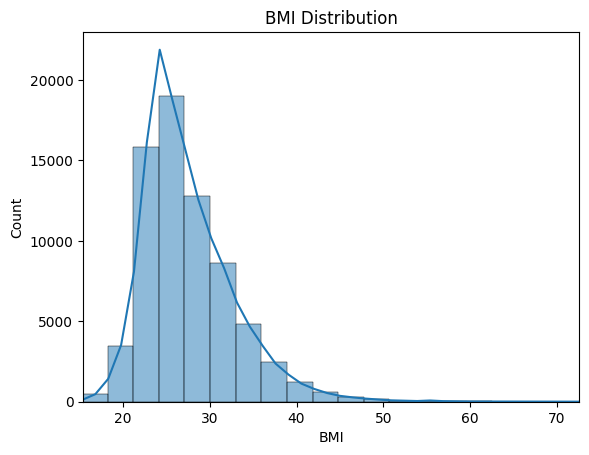

In [14]:
sns.histplot(x=df['BMI'], bins=100, kde=True)
plt.title('BMI Distribution')
# plt.xlim(10, 75)
plt.xlim(df['BMI'].quantile(0.0005), df['BMI'].quantile(0.9995))

Based on this histplot and a general search for what's considered a plausible range of BMI, I'll set the limits to 10-75 BMI.

In [15]:
df = df[ (df['BMI'] >= 10) & (df['BMI'] <= 70)]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
count,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000,69958.000000
mean,49973.589883,19468.903485,1.349581,164.400898,74.197986,128.818048,96.624746,1.366934,1.226536,0.088124,0.053761,0.803754,0.499700,53.338818,27.495473
std,28851.528175,2467.203968,0.476841,7.985172,14.347457,154.056106,188.490208,0.680301,0.572363,0.283478,0.225547,0.397160,0.500003,6.765152,5.284224
min,0.000000,10798.000000,1.000000,91.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,10.726644
25%,25009.250000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50007.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.370238
75%,74889.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.189591
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,70.000000


<Axes: xlabel='BMI'>

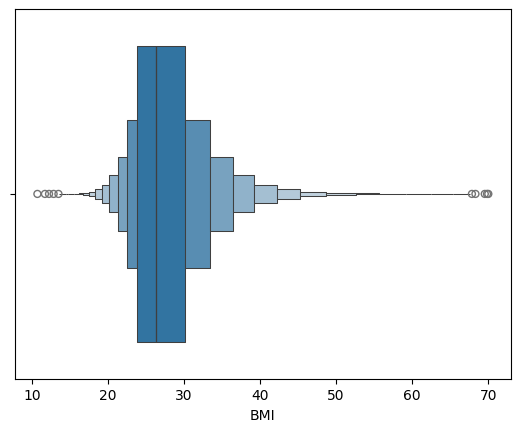

In [16]:
sns.boxenplot(x=df['BMI'])

39 samples have thus been dropped, and the σ has dropped significantly.

2) Create a categorical BMI feature with the categories: normal range, over weight, obese (class I), obese (class II), obese (class III).

In [17]:
df['BMI_categories'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])
df['BMI_categories'].value_counts()

BMI_categories
Normal         25804
Overweight     25073
Obesity I      12211
Obesity II      4390
Obesity III     1836
Underweight      644
Name: count, dtype: int64

It is very good to retain a more sane definition of what is normal, and not redefine it based on the current abnormal.

### 3) Check if the category is relevant, i.e. its correlations. Update the data analysis if you find something interesting.

In [18]:
# First we need to create a dummy for the BMI categories

df = pd.get_dummies(df, columns=['BMI_categories'], drop_first=True, dtype=int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,BMI_categories_Normal,BMI_categories_Overweight,BMI_categories_Obesity I,BMI_categories_Obesity II,BMI_categories_Obesity III
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,0,0,1,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,1,0,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,0,1,0,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,1,0,0,0,0


<Axes: >

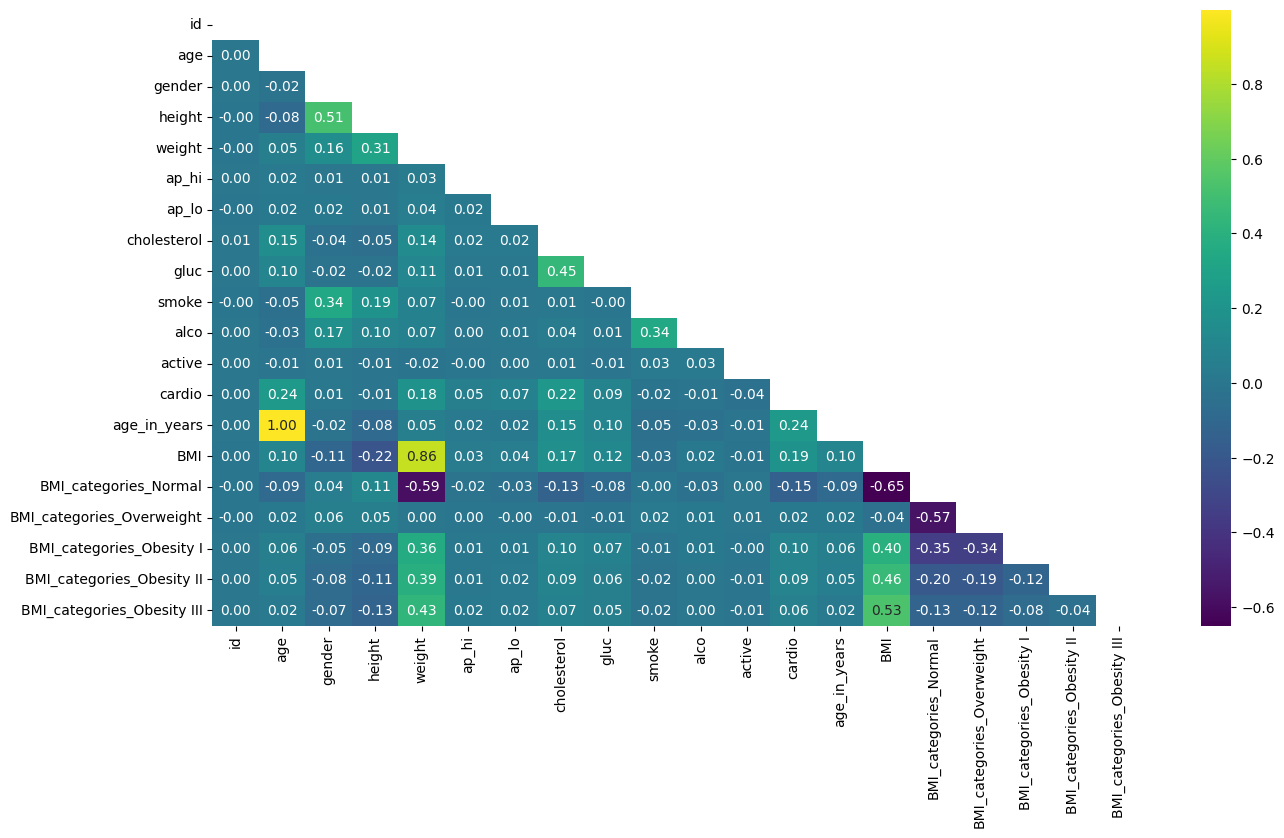

In [19]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), mask=mask, cmap='viridis', annot=True, fmt='.2f')

Findings: BMI is only 0.01 more correlated to cardio than mere weight, using these limits as to what to exclude. Normal weight is associated with a 0.15 drop in correlation. Surprising might be that the obesity level with the highest association to cardio is level 1, after which it drops from 0.1 through 0.09 to 0.06 for class III.

Create a feature for blood pressure categories according to the table in the linked article: https://www.healthline.com/health/high-blood-pressure-hypertension#definition

In [20]:
# Filter unrealistic values
df = df[(df['ap_hi'] >= 40) & (df['ap_hi'] <= 300)]
df = df[(df['ap_lo'] >= 30) & (df['ap_lo'] <= 260)]

Filtering based on what reasonable values might be, below which organs cannot be supported, and the upper limit set based on the boxenplot, that showed a consistent stream of values. Also consultet ChatGTP, who claimed that values of 300 had been reported in the literature, but are extremely rare. 

The deciding factor here has been whether the value is realistic in and of itself. One could be more strict in order to trim outliers and keep focus on optimizing the predictions of the model. 

In [21]:
def assign_blood_pressure_category(row):
    systolic = row['ap_hi']
    diastolic = row['ap_lo']
    
    if systolic < 90 and diastolic < 60:
        return 'Hypotension'
    elif systolic < 120 and diastolic < 80:
        return 'Healthy'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Stage 1 Hypertension'
    elif 140 <= systolic <= 180 or diastolic >= 90 :
        return 'Stage 2 Hypertension'
    elif systolic > 180 or diastolic > 120:
        return 'Hypertension Crisis'
    else:
        return 'Uncategorized'

df['blood_pressure_category'] = df.apply(assign_blood_pressure_category, axis=1)
df['blood_pressure_category'].value_counts()


blood_pressure_category
Stage 1 Hypertension    39749
Stage 2 Hypertension    16319
Healthy                  9538
Elevated                 3112
Hypotension                14
Hypertension Crisis        10
Name: count, dtype: int64

A missing category in the classification is Hypotention. Now, regardless of how low blood pressure, it is categorized as healthy. Hence created a new category. 

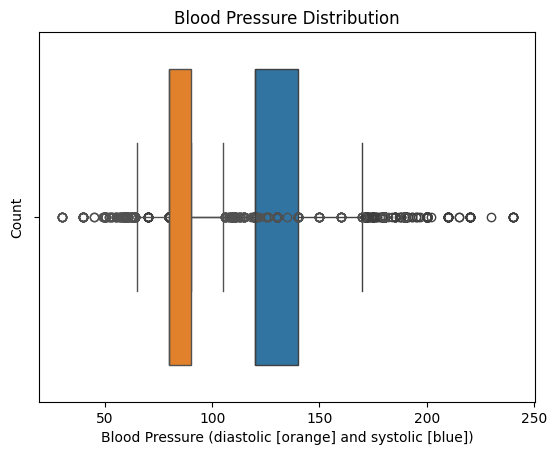

In [22]:
plt.title('Blood Pressure Distribution')
plt.ylabel('Count')
plt.xlabel('Blood Pressure (diastolic [orange] and systolic [blue])')
sns.boxplot(x=df['ap_hi'])
sns.boxplot(x=df['ap_lo'])
plt.show()

4) Discard samples with unreasonable blood pressures and outliers. Like the previous tasks, it is not trivial to set the limits. Describe how you decide upon the limits.

Done above.

5) Create a categorical feature with relevant categories.

In [23]:
df = pd.get_dummies(df, columns=['blood_pressure_category'], drop_first=True, dtype=int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,BMI_categories_Normal,BMI_categories_Overweight,BMI_categories_Obesity I,BMI_categories_Obesity II,BMI_categories_Obesity III,blood_pressure_category_Healthy,blood_pressure_category_Hypertension Crisis,blood_pressure_category_Hypotension,blood_pressure_category_Stage 1 Hypertension,blood_pressure_category_Stage 2 Hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,...,0,0,1,0,0,0,0,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,...,1,0,0,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,...,1,0,0,0,0,1,0,0,0,0


<Axes: >

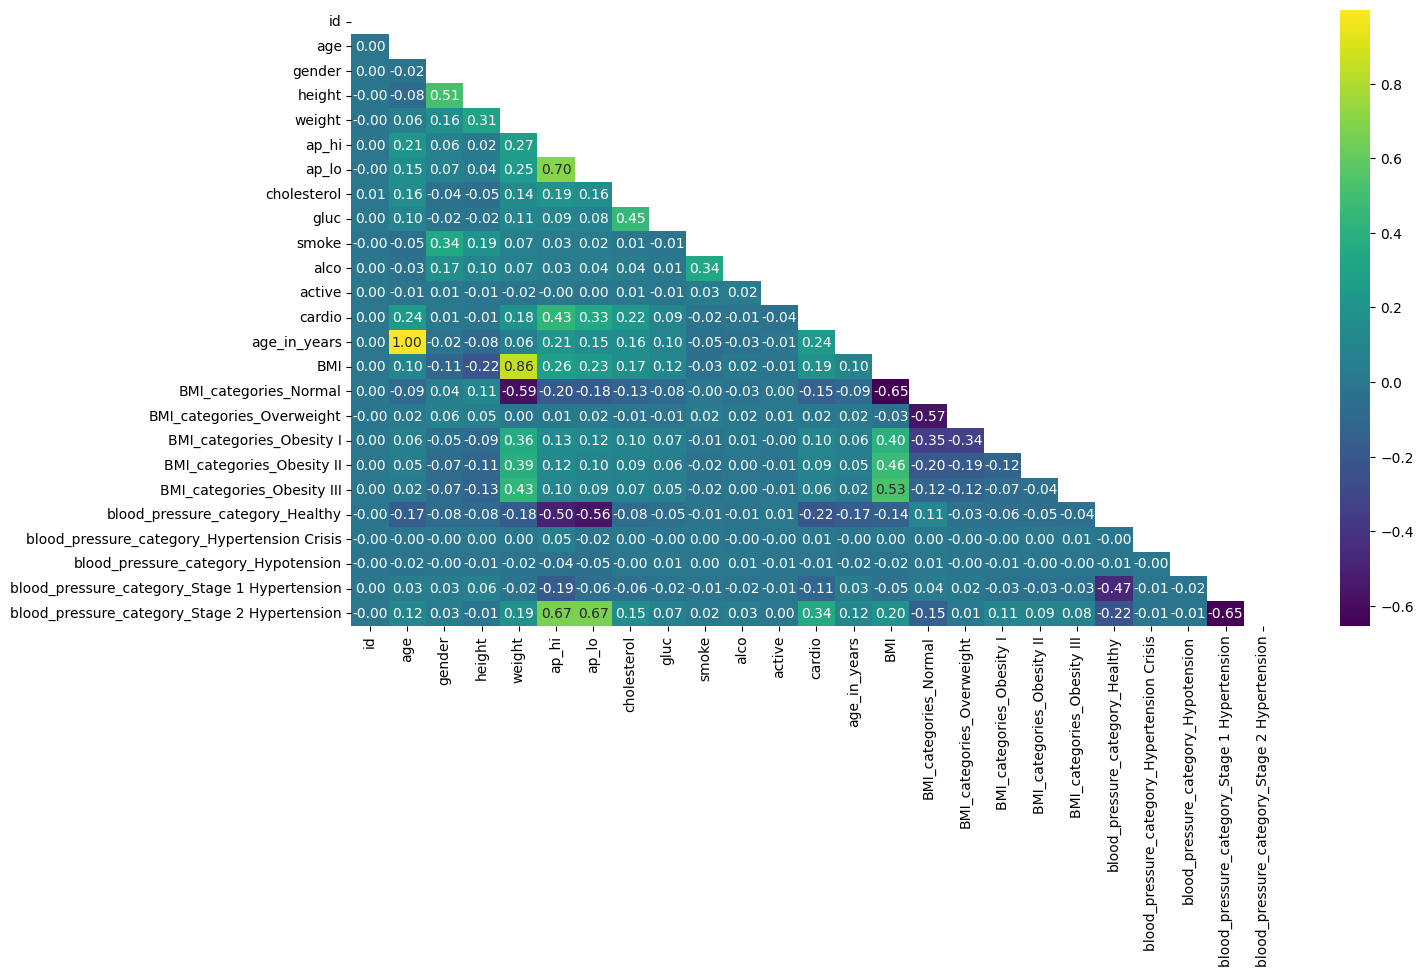

In [24]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask[np.abs(corr) < 0.15] = True

plt.figure(figsize=(15, 8))
sns.heatmap(corr, mask=mask, cmap='viridis', annot=True, fmt='.2f')

Findings: While Stage 1 Hypertension is slightly negatively correlated (-0.11) to cardio, Stage 2 is of a relatively strong kind (0.34). The other blood pressure categories are basically not correlated at all (0.01). This is in stark contrast to ap_hi (0.43) and ap_lo (0.33) 


6) Check if the new category is relevant, i.e. is the correlation useful? Update the data analysis if you find something interesting.
*Tip: After you have selected borders and created categories, check which categories are actually occurs in your data.*

Blood pressure stage 2 Hypertension is the only useful new category. The correlation is however not greater than that of the original blood pressure categories, even though it seems to be more precise.

## 1.2.2 Create two datasets
Create a copy of your dataframe.
* On one data frame: remove the following features: ap hi, ap lo, height,
weight, BMI and do one-hot encoding on BMI category, blood pressure category and gender
* On the second data frame: remove the following features: BMI category, blood pressure category,
height, weight and perform one-hot encoding on gender.

Thus, one data set with categorical data added and one with only BMI added.

In [25]:
df_categorical = df.copy()
df_categorical.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'age_in_years'], axis=1, inplace=True)

In [26]:
df_categorical = pd.get_dummies(df_categorical, columns=['gender'], drop_first=True, dtype=int)
df_categorical.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_categories_Normal,BMI_categories_Overweight,BMI_categories_Obesity I,BMI_categories_Obesity II,BMI_categories_Obesity III,blood_pressure_category_Healthy,blood_pressure_category_Hypertension Crisis,blood_pressure_category_Hypotension,blood_pressure_category_Stage 1 Hypertension,blood_pressure_category_Stage 2 Hypertension,gender_2
0,0,18393,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,1,20228,3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,2,18857,3,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,3,17623,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1
4,4,17474,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [27]:
df_BMI = df.copy()
df_BMI.drop(['height', 'weight', 'age_in_years', 'BMI_categories_Normal', 'BMI_categories_Overweight', 'BMI_categories_Obesity I', 'BMI_categories_Obesity II', 'BMI_categories_Obesity III',
             'blood_pressure_category_Healthy', 'blood_pressure_category_Hypertension Crisis', 'blood_pressure_category_Hypotension', 
             'blood_pressure_category_Stage 1 Hypertension', 'blood_pressure_category_Stage 2 Hypertension'], axis=1, inplace=True)
df_BMI = pd.get_dummies(df_BMI, columns=['gender'], drop_first=True, dtype=int)
df_BMI.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
0,0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,0


### 1.2.3 Implementation
Choose three or more algorithms. For each algorithm:
1) Use gridsearchCV to scale and hyperparameter optimize each
algorithm

I choose Logistic Regression, Random Forest Classifier, and KNN

In [28]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [42]:
scaler = StandardScaler()

# constructing different pipelines for different models
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipe_logistic = Pipeline(
    [
        ("scaler", scaler),
        ("log", LogisticRegression(penalty="elasticnet", solver="saga", multi_class="auto", max_iter=1000)),
    ]
)

# No scaler for Random Forest
pipe_forest = Pipeline([("forest", RandomForestClassifier())])

# specify parameters to tune
param_grid_KNN = {"knn__n_neighbors": list(range(1, 50)),
                  "knn__weights": ["uniform", "distance"],
                  "knn__metric": ["minkowski", "euclidean", "manhattan", "chebyshev"],
}
param_grid_logistic = {
    "log__l1_ratio": np.linspace(0, 1, 10),
    "log__C": np.logspace(-4, 4, 10)
} 

param_grid_forest = {
    "forest__n_estimators": [100, 200, 300],
    "forest__max_depth": [10, 20, 30],
    "forest__min_samples_split": [2, 5, 10],
    "forest__min_samples_leaf": [2, 4],
    "forest__bootstrap": [True, False],
    "forest__max_features": ["sqrt", "log2"],
    # "forest__criterion": ["gini", "entropy"], # Skipping this parameter to reduce the number of combinations
}

# Testing new parameters for the BMI dataset based on the results of the previous models
# exploring best boundaries and cutting training time

BMI_param_grid_KNN = {"knn__n_neighbors": list(range(30, 55)),
                  "knn__weights": ["uniform"],
                  "knn__metric": ["minkowski", "euclidean"],
}
BMI_param_grid_logistic = {
    "log__l1_ratio": np.linspace(0, 1, 10),
    "log__C": np.logspace(-4, 4, 10)
}  

BMI_param_grid_forest = {
    "forest__n_estimators": [50, 75, 100],
    "forest__max_depth": [5, 8, 10],
    "forest__min_samples_split": [10, 15, 20],
    "forest__min_samples_leaf": [4,8],
    "forest__bootstrap": [True],
    "forest__max_features": ["log2"],
    "forest__oob_score": [True]
}

# Classifiers for the Categorical dataset
classifier_cat_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

classifier_cat_logistic = GridSearchCV(
    estimator=pipe_logistic, param_grid=param_grid_logistic, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

classifier_cat_forest = GridSearchCV(
    estimator=pipe_forest, param_grid=param_grid_forest, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

# Classifiers for the BMI dataset
classifier_BMI_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=BMI_param_grid_KNN, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

classifier_BMI_logistic = GridSearchCV(
    estimator=pipe_logistic, param_grid=BMI_param_grid_logistic, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

classifier_BMI_forest = GridSearchCV(
    estimator=pipe_forest, param_grid=BMI_param_grid_forest, cv=5, scoring="accuracy", n_jobs=3, verbose=10
)

In [68]:
classifier_cat_KNN

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan',
                                         'chebyshev'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [69]:
classifier_cat_logistic

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             n_jobs=3,
             param_grid={'log__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'log__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='accuracy', verbose=10)

In [70]:
classifier_cat_forest
df_categorical.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_categories_Normal,BMI_categories_Overweight,BMI_categories_Obesity I,BMI_categories_Obesity II,BMI_categories_Obesity III,blood_pressure_category_Healthy,blood_pressure_category_Hypertension Crisis,blood_pressure_category_Hypotension,blood_pressure_category_Stage 1 Hypertension,blood_pressure_category_Stage 2 Hypertension,gender_2
0,0,18393,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,1,20228,3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,2,18857,3,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,3,17623,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1
4,4,17474,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


First checking the df_categorical. Later doing it all again with the BMI dataset:

In [37]:
X, y = df_categorical.drop('cardio', inplace=False, axis=1), df_categorical['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48119, 18), (20623, 18), (48119,), (20623,))

In [40]:
# train the models 
classifier_cat_KNN.fit(X_train, y_train)


Fitting 5 folds for each of 392 candidates, totalling 1960 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan',
                                         'chebyshev'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [33]:
classifier_cat_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             n_jobs=3,
             param_grid={'log__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'log__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='accuracy', verbose=10)

In [34]:
classifier_cat_forest.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('forest', RandomForestClassifier())]),
             n_jobs=3,
             param_grid={'forest__bootstrap': [True, False],
                         'forest__max_depth': [10, 20, 30],
                         'forest__max_features': ['sqrt', 'log2'],
                         'forest__min_samples_leaf': [2, 4],
                         'forest__min_samples_split': [2, 5, 10],
                         'forest__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=10)

##### Cost in terms of time per fit:
| Model     | Total Training Time (minutes) | Number of Fits | Time Per Fit (seconds) |
|-----------|-------------------------------|----------------|------------------------|
| KNN       | 141                           | 1960           | 4.32                   |
| Forest    | 243                           | 1080           | 13.50                  |
| Logistic  | 23                            | 500            | 2.76                   |


2) Evaluate the resulting model

              precision    recall  f1-score   support

           0       0.68      0.77      0.72     10345
           1       0.73      0.63      0.68     10278

    accuracy                           0.70     20623
   macro avg       0.70      0.70      0.70     20623
weighted avg       0.70      0.70      0.70     20623



Text(0.5, 1.0, 'KNN Confusion Matrix')

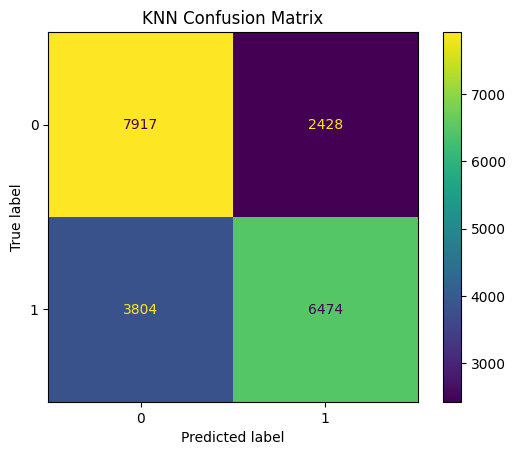

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

# First evaluating the KNN model
y_pred_KNN = classifier_cat_KNN.predict(X_test)
y_pred_KNN

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_KNN))
cm = confusion_matrix(y_test, y_pred_KNN)

ConfusionMatrixDisplay(cm).plot().ax_.set_title('Categorical: KNN Confusion Matrix')

              precision    recall  f1-score   support

           0       0.68      0.78      0.72     10345
           1       0.74      0.63      0.68     10278

    accuracy                           0.70     20623
   macro avg       0.71      0.70      0.70     20623
weighted avg       0.71      0.70      0.70     20623



Text(0.5, 1.0, 'Categorial: Logistic Regression')

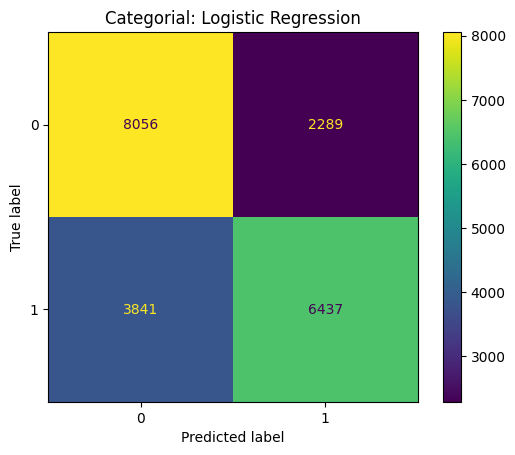

In [79]:
# Now the logistic regression model
y_pred_logistic = classifier_cat_logistic.predict(X_test)
print(classification_report(y_test, y_pred_logistic))
cm = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(cm).plot().ax_.set_title('Categorial: Logistic Regression')

              precision    recall  f1-score   support

           0       0.68      0.78      0.73     10345
           1       0.74      0.64      0.68     10278

    accuracy                           0.71     20623
   macro avg       0.71      0.71      0.71     20623
weighted avg       0.71      0.71      0.71     20623



Text(0.5, 1.0, 'Categorial: Random Forest')

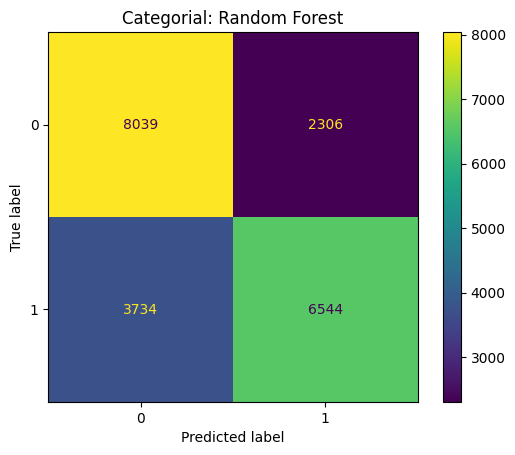

In [80]:
# Finally the Random Forest model
y_pred_forest = classifier_cat_forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot().ax_.set_title('Categorial: Random Forest')

#### Results  
- When it comes to a critical application such as evaluating health status, **precision** for disease presence is very important. A lower precision could lead to unneccesary worry for patients, additional medical tests, and unnecessary treatment. Both *Linear Classification* and *Random Forest* perform equally well here, while KNN performs slightly worse, 0.74 vs. 0.73.
- A higher **recall** for disease presence means fewer false negatives, which indicates that fewer actual cases of the disease are being missed. *Random Forest* performs slighlty better than the others here.
- All models perform have the same **F1-score** for disease presence (0.68). This is a measure that considers both the precision and the recall. *Random Forest* performs slightly better on F1-score for absence of disease (0.73 vs 0.72).
- The **average** accuracy is 0.71 for *Random Forest*, slightly better than the others (0.70).
<br><br>

| Model      | Precision 0 | Recall 0 | F1-score 0 | Precision 1 | Recall 1 | F1-score 1 | Accuracy |
|------------|-------------|----------|------------|-------------|----------|------------|----------|
| Forest     | 0.68        | 0.78     | 0.73       | 0.74        | 0.64     | 0.68       | 0.71     |
| Logistic   | 0.68        | 0.78     | 0.72       | 0.74        | 0.63     | 0.68       | 0.70     |
| KNN        | 0.68        | 0.77     | 0.72       | 0.73        | 0.63     | 0.68       | 0.70     |

All in all, *Random Forest* is the best performing model for this dataset. To be compared with the results from the BMI dataset.

3) Check the hyperparameters that led to the best results

In [86]:
classifier_cat_logistic.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(C=0.005994842503189409, l1_ratio=0.0, max_iter=1000,
                      penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(C=0.005994842503189409, l1_ratio=0.0, max_iter=1000,
                    penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 0.005994842503189409,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.0,
 'log__max_iter': 1000,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [87]:
classifier_cat_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=46))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=46),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 46,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [88]:
classifier_cat_forest.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('forest',
   RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                          min_samples_split=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'forest': RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                        min_samples_split=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__class_weight': None,
 'forest__criterion': 'gini',
 'forest__max_depth': 10,
 'forest__max_features': 'log2',
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 4,
 'forest__min_samples_split': 10,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__n_estimators': 100,
 'forest__n_jobs': None,
 'forest__oob_score': False,
 'forest__random_state': None,
 'forest__verbose': 0,
 'forest__wa

**Best Forest model settings found during Grid Search:** 

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('forest',
   RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                          min_samples_split=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'forest': RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                        min_samples_split=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__class_weight': None,
 'forest__criterion': 'gini',
 'forest__max_depth': 10,
 'forest__max_features': 'log2',
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 4,
 'forest__min_samples_split': 10,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__n_estimators': 100,
 'forest__oob_score': False,
 'forest__random_state': None,
 'forest__warm_start': False}

 Here are the ones that were evaluated for values other than the default values:

forest__n_estimators: Number of trees in the forest.

- **`forest__n_estimators`**: Number of trees in the forest.
  - Best found: 100
  - Options tested: [100, 200, 300]

- **`forest__max_depth`**: Maximum depth of the trees.
  - Best found: 10
  - Options tested: [10, 20, 30]

- **`forest__min_samples_split`**: Minimum number of samples required to split an internal node.
  - Best found: 10
  - Options tested: [2, 5, 10]

- **`forest__min_samples_leaf`**: Minimum number of samples required to be at a leaf node.
  - Best found: 4
  - Options tested: [2, 4]

- **`forest__bootstrap`**: Whether bootstrap samples are used when building trees.
  - Best found: True
  - Options tested: [True, False]

- **`forest__max_features`**: The number of features to consider when looking for the best split.
  - Best found: 'log2'
  - Options tested: ['sqrt', 'log2']

These parameters were part of the parameter grid for hyperparameter tuning. The values listed as "best found" were selected as the optimal choices after the cross-validation process used in the grid search. 

The training had to leave out several values for all of the models, in order to fit time and computational power restraints. It it possible that such values would have yielded even better results. Boosting methods could potentially also improve the performance of the models, but given the restraints that will be for the future.  

#### Save progress

In [39]:
from joblib import dump, load

dump(classifier_cat_logistic, './save/cat_classifier_logistic.joblib')

['./save/cat_classifier_logistic.joblib']

In [41]:
dump(classifier_cat_KNN, './save/cat_classifier_KNN.joblib')

['./save/cat_classifier_KNN.joblib']

In [38]:
dump(classifier_cat_forest, './save/cat_classifier_forest.joblib')

['./save/cat_classifier_forest.joblib']

#### Now training on the BMI dataset

In [43]:
X, y = df_BMI.drop('cardio', inplace=False, axis=1), df_BMI['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48119, 11), (20623, 11), (48119,), (20623,))

In [34]:
# train the models 
classifier_BMI_KNN.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37,
                                              38, 39, 40, 41, 42, 43, 44, 45,
                                              46, 47, 48, 49, 50, 51, 52, 53,
                                              54],
                         'knn__weights': ['uniform']},
             scoring='accuracy', verbose=10)

In [32]:
classifier_BMI_logistic.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             n_jobs=3,
             param_grid={'log__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'log__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='accuracy', verbose=10)

In [44]:
classifier_BMI_forest.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestClassifier())]),
             n_jobs=3,
             param_grid={'forest__bootstrap': [True],
                         'forest__max_depth': [5, 8, 10],
                         'forest__max_features': ['log2'],
                         'forest__min_samples_leaf': [4, 8],
                         'forest__min_samples_split': [10, 15, 20],
                         'forest__n_estimators': [30, 50, 75],
                         'forest__oob_score': [True]},
             scoring='accuracy', verbose=10)

##### Training cost
The training cost has been significantly reduced thank to changing the hyperparameters based on the tuning for the categorical dataset.

| Model     | Total Training Time | Number of Fits | Time Per Fit (seconds) |
|-----------|---------------------|----------------|------------------------|
| KNN       | 20m 13s             | 250            | 4.852                   |
| Forest    | 12m 49s             | 270            | 2.848                   |
| Logistic  | 1m 28s              | 500            | 0.176                   |


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10345
           1       0.76      0.67      0.71     10278

    accuracy                           0.73     20623
   macro avg       0.73      0.73      0.73     20623
weighted avg       0.73      0.73      0.73     20623



Text(0.5, 1.0, 'BMI: KNN Confusion Matrix')

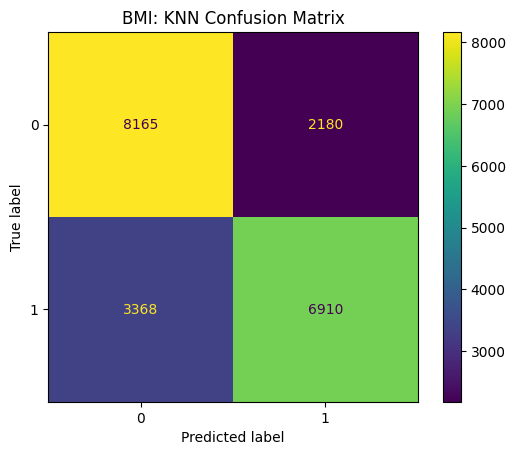

In [82]:
# First evaluating the KNN model
y_pred_KNN = classifier_BMI_KNN.predict(X_test)
y_pred_KNN


print(classification_report(y_test, y_pred_KNN))
cm = confusion_matrix(y_test, y_pred_KNN)
ConfusionMatrixDisplay(cm).plot().ax_.set_title('BMI: KNN Confusion Matrix')

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10345
           1       0.76      0.66      0.71     10278

    accuracy                           0.73     20623
   macro avg       0.73      0.73      0.73     20623
weighted avg       0.73      0.73      0.73     20623



Text(0.5, 1.0, 'BMI: Logistic Regression')

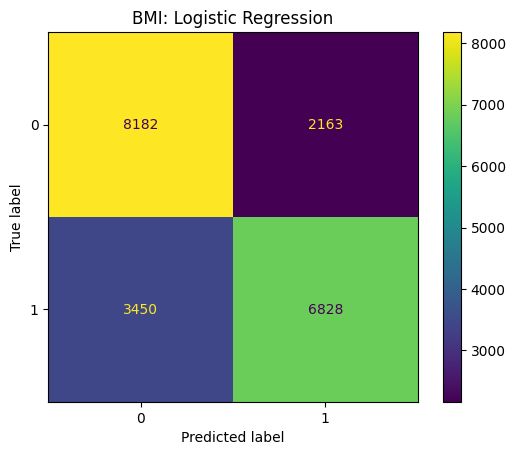

In [83]:
# Now the logistic regression model
y_pred_logistic = classifier_BMI_logistic.predict(X_test)
print(classification_report(y_test, y_pred_logistic))
cm = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(cm).plot().ax_.set_title('BMI: Logistic Regression')

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10345
           1       0.77      0.68      0.72     10278

    accuracy                           0.74     20623
   macro avg       0.74      0.74      0.73     20623
weighted avg       0.74      0.74      0.73     20623



Text(0.5, 1.0, 'BMI: Random Forest')

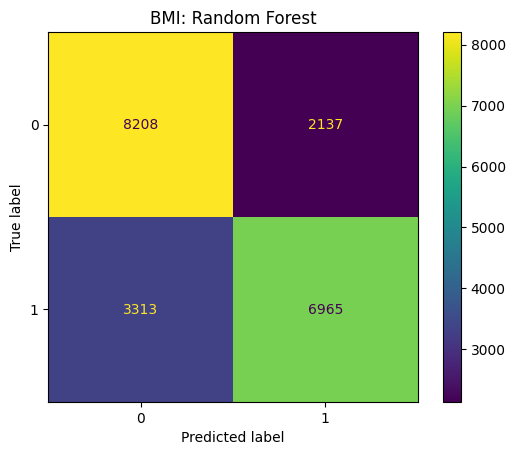

In [45]:
# Finally the Random Forest model
y_pred_forest = classifier_BMI_forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot().ax_.set_title('BMI: Random Forest')

##### Summary

| Metric               | Random Forest | Logistic | KNN    |
|----------------------|---------------|----------|--------|
| Accuracy             | **0.74**      | 0.73     | 0.73   |
| Precision Class 0    | *0.71*          | 0.70     | *0.71*   |
| Precision Class 1    | *0.76*      | *0.76* | *0.76* |
| Recall Class 0       | *0.79*      | *0.79* | *0.79* |
| Recall Class 1       | **0.68**      | 0.66     | 0.67   |
| F1-Score Class 0     | *0.75*      | 0.74     | *0.75* |
| F1-Score Class 1     | **0.72**      | 0.71     | 0.71   |
| Macro Avg F1-Score   | *0.73*      | *0.73* | *0.73* |
| Weighted Avg F1-Score| *0.73*      | *0.73* | *0.73* |

Based on the table we see that *Random Forest* is the best performing model also for this dataset. This model also improves upon all metrics of the Random Forest model for the categorical dataset. (**Bold**=best, *Italic*=draw)
<br><br>
Let's compare the results for the different datasets and models.

| Metric                | Categorical Random Forest | BMI Random Forest |
|-----------------------|------------------------|-----------------------|
| Accuracy              | 0.71                   | **0.74**              |
| Precision Class 0     | 0.68                   | **0.71**              |
| Precision Class 1     | 0.74                   | **0.76**              |
| Recall Class 0        | 0.78                   | **0.79**              |
| Recall Class 1        | 0.64                   | **0.68**              |
| F1-Score Class 0      | 0.73                   | **0.75**              |
| F1-Score Class 1      | 0.68                   | **0.72**              |
| Macro Avg F1-Score    | 0.71                   | **0.73**              |
| Weighted Avg F1-Score | 0.71                   | **0.73**              |

Thus, the chosen dataset is BMI and the chosen model is Random Forest.

In [37]:
classifier_BMI_logistic.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(C=0.005994842503189409, l1_ratio=0.0, max_iter=1000,
                      penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(C=0.005994842503189409, l1_ratio=0.0, max_iter=1000,
                    penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 0.005994842503189409,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.0,
 'log__max_iter': 1000,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [39]:
classifier_BMI_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=47))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=47),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 47,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [46]:
classifier_BMI_forest.best_estimator_.get_params()


{'memory': None,
 'steps': [('forest',
   RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                          min_samples_split=20, n_estimators=50, oob_score=True))],
 'verbose': False,
 'forest': RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                        min_samples_split=20, n_estimators=50, oob_score=True),
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__class_weight': None,
 'forest__criterion': 'gini',
 'forest__max_depth': 10,
 'forest__max_features': 'log2',
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 4,
 'forest__min_samples_split': 20,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__monotonic_cst': None,
 'forest__n_estimators': 50,
 'forest__n_jobs': None,
 'forest__oob_score': True,
 'forest__random_state': None,
 'forest__verbose': 0,
 'forest__warm_start': False}

Best parameters found:

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('forest',
   RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                          min_samples_split=20, n_estimators=50))],
 'verbose': False,
 'scaler': StandardScaler(),
 'forest': RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                        min_samples_split=20, n_estimators=50),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__class_weight': None,
 'forest__criterion': 'gini',
 'forest__max_depth': 10,
 'forest__max_features': 'log2',
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 4,
 'forest__min_samples_split': 20,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__n_estimators': 50,
 'forest__n_jobs': None,
 'forest__oob_score': False,
 'forest__random_state': None,
 'forest__verbose': 0,
 'forest__warm_start': False}

### Evaluating the best GridSearch Options

| Parameter                 | Best Model Value | GridSearch Options            |
|---------------------------|------------------|-------------------------------|
| `forest__n_estimators`    | 50               | [50, 75, 100]                 |
| `forest__max_depth`       | 10               | [5, 8, 10]                    |
| `forest__min_samples_split`| 20              | [10, 15, 20]                  |
| `forest__min_samples_leaf` | 4               | [4, 8]                        |
| `forest__bootstrap`       | True             | [True]                        |
| `forest__max_features`    | 'log2'           | ['log2']                      |

#### Comparing the GridSearch Options and Results for both Random Forest models

| Parameter            | GridSearch Options Categorical Model | Best Model Values Categorical Model | GridSearch Options BMI Model | Best Model Values BMI Model |
|----------------------|--------------------------------------|-------------------------------------|------------------------------|-----------------------------|
| `n_estimators`       | [100, 200, 300]                      | 100                                 | [50, 75, 100]                | 50                          |
| `max_depth`          | [10, 20, 30]                         | 10                                  | [5, 8, 10]                   | 10                          |
| `min_samples_split`  | [2, 5, 10]                           | 10                                  | [10, 15, 20]                 | 20                          |
| `min_samples_leaf`   | [2, 4]                               | 4                                   | [4, 8]                       | 4                           |
| `bootstrap`          | [True, False]                        | True                                | [True]                       | True                        |
| `max_features`       | ["sqrt", "log2"]                     | "log2"                              | ["log2"]                     | "log2"                      |


The best *n_estimators* was consistently comprised by the lowest number of the options to try out. *Min_samples_split* was always the highest number. *Max_depth* and *min_samples_leaf* both ended up with the same result, though the options were at the opposite end of the parameter tuning spectrums. 

This incicates that it could be worthwhile to explore fitting the models with higher values of *min_samples_split*, and lower values of *n_estimators*. 

#### Save progress

In [71]:
from joblib import dump, load

In [42]:
dump(classifier_BMI_logistic, './save/BMI_classifier_logistic.joblib')

['./save/BMI_classifier_logistic.joblib']

In [44]:
dump(classifier_BMI_KNN, './save/BMI_classifier_KNN.joblib')

['./save/BMI_classifier_KNN.joblib']

In [43]:
dump(classifier_BMI_forest, './save/BMI_classifier_forest.joblib')

['./save/BMI_classifier_forest.joblib']

4) Collect data on the outcome for later presentation

In [72]:
classifier_cat_logistic = load('./save/cat_classifier_logistic.joblib')
classifier_cat_KNN = load('./save/cat_classifier_KNN.joblib')
classifier_cat_forest = load('./save/cat_classifier_forest.joblib')

In [73]:
classifier_BMI_logistic = load('./save/BMI_classifier_logistic.joblib')
classifier_BMI_KNN = load('./save/BMI_classifier_KNN.joblib')
classifier_BMI_forest = load('./save/BMI_classifier_forest.joblib')

Repeat this for both datasets. Choose dataset and model based on your results.
Document the results and justify the choices.

### 1.3 Packaging and demo
#### 1.3.1 Save model
Start by picking 100 randomly selected rows from your dataset. Export these 100 samples in test_samples.csv. Then you take the best model and train on all the data we have except for the 100 data points you picked out. Save the model in a .pkl file using joblib.dump(). You might need to use the compress argument to compress the file if the size is too big.

In [45]:
# Based on the best dataset and model
df_best = df_BMI

# Pick 100 randomly selected patients from the dataset
random_patients = df_best.sample(100, random_state=42)
random_patients.to_csv('./save/test_samples.csv')

# Drop these rows from the original DataFrame
df_best_dropped = df_best.drop(random_patients.index)

In [46]:
# Train the model on the remaining data
X, y = df_best_dropped.drop('cardio', inplace=False, axis=1), df_best_dropped['cardio']

# Train the models using the hyperparameters from the best model, 
# thus creating the RandomForestClassifier with the tuned hyperparameters.
# This assumes that the RandomForestClassifier for the Categorical dataset was the best model and dataset combination.

bmi_rf_clf = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=10,  # Maximum depth of the trees
    min_samples_split=20,  # Minimum number of samples required to split an internal node
    min_samples_leaf=4,  # Minimum number of samples required to be at a leaf node
    bootstrap=True,  # Whether bootstrap samples are used when building trees
    max_features='log2',  # The number of features to consider when looking for the best split
)

# Display the RandomForestClassifier object
bmi_rf_clf

# Fit the model to all available data except for the sample of 100 patients
bmi_rf_clf.fit(X, y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=20, n_estimators=50)

In [47]:
from joblib import dump, load

In [ ]:
dump(bmi_rf_clf, './save/best_rf_bmi.pkl', compress=5)